# Steel Defect Identification Project - Exploratory Data Analysis

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
# Getting the length of our train_images directory
train_filenames = list(os.walk('Original Dataset Package/Steel Images/train_images'))[0][2]

# Printing the result
print(f'There are {len(train_filenames)} images in our training set.')

There are 12568 images in our training set.


In [7]:
# Getting the length of our train_images directory
test_filenames = list(os.walk('Original Dataset Package/Steel Images/test_images'))[0][2]

# Printing the result
print(f'There are {len(test_filenames)} images in our test set.')

There are 5506 images in our test set.


In [33]:
# Importing the train.csv as a pandas dataframe
train_df = pd.read_csv('Original Dataset Package/train.csv')

# Displaying the shape
print(f'train_df shape: {train_df.shape}')

# Taking a look at the head of our dataframe
train_df.head()

train_df shape: (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [5]:
# Printing the number of unique file names
print(f'There are {len(set(train_df["ImageId"]))} images in our training set with defects.')

There are 6666 images in our training set with defects.


[5902, 6239, 425, 2]


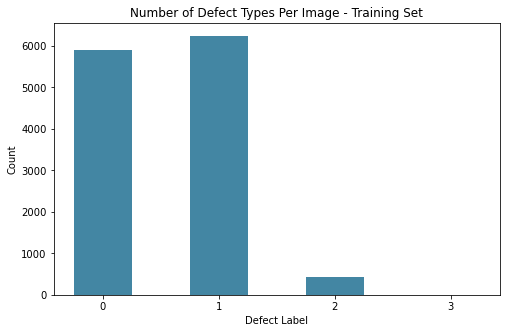

In [59]:
# Making a dictionary tying each filename to number of defect types for later use
defects_per_image_dict = dict(train_df['ImageId'].value_counts())

# This list holds the number of defect types for each unique filename in our dataframe
defects_per_image = list(train_df.ImageId.value_counts())

# The class labels of the defect types 
labels = ['0', '1', '2', '3']

# This list tracks number of defect types, '0' is preset to 5902 because there are 5902
# images in our training set with no defects present 
label_counts = [5902, 0, 0, 0]

# Iterating through the defect type count list, tracking how many times each number appears
for i in defects_per_image:
    label_counts[i] += 1
    
# 
print(label_counts)
    
# Plotting the results
fig, ax  = plt.subplots(figsize=(8,5))
plt.bar(labels, label_counts, width=.5, color='#4386a3')
plt.title('Number of Defect Types Per Image - Training Set')
plt.xlabel('Defect Label')
plt.ylabel('Count')
plt.show()